In [1]:
import torch 
from utils.data_utils import read_client_data
from torch.utils.data import DataLoader

In [2]:
model=t.load('./models/HAR/FedAvg_server.pt',weights_only=False)

In [3]:
s=0
for i in range(20):
    test_data = DataLoader(read_client_data('HAR', i, is_train=False), 16, drop_last=True, shuffle=True) 
    test_acc = 0
    with t.no_grad():
            for data, y in test_data:
                data = data.float().to('cuda')
                y = y.view((-1)).long().to('cuda')

                # forward pass
                features, seq_features = model.feature_extractor(data)
                output = model.classifier(features)

                # compute loss
                test_acc += (t.sum(t.argmax(output, dim=1) == y)).item()
                total = len(test_data.dataset)
                p=test_acc / total * 100
    print(f'Accuracy: {p:.2f}%')
    s+=p
print(f'Mean: {s/20:.2f}%')

Accuracy: 68.57%
Accuracy: 67.03%
Accuracy: 67.96%
Accuracy: 75.00%
Accuracy: 67.03%
Accuracy: 83.67%
Accuracy: 44.09%
Accuracy: 65.88%
Accuracy: 37.93%
Accuracy: 40.45%
Accuracy: 78.95%
Accuracy: 69.79%
Accuracy: 53.54%
Accuracy: 59.79%
Accuracy: 64.65%
Accuracy: 45.45%
Accuracy: 53.15%
Accuracy: 66.36%
Accuracy: 70.37%
Accuracy: 57.01%
Mean: 61.83%


In [ ]:
num_client=[1,2,4,6,10,12]
acc=[1,0.7194,0.6101,0.4657,0.6134,0.5912,]

In [ ]:
sourc_client=[29,20,19,22,1]
acc=[0.7107,0.9218,0.9087,0.9096,0.9072]
acc=[0.7093,0.9218,0.9229,0.9131,0.9089]
acc=[0.7143,0.9218,0.9118,0.9127,0.9089]

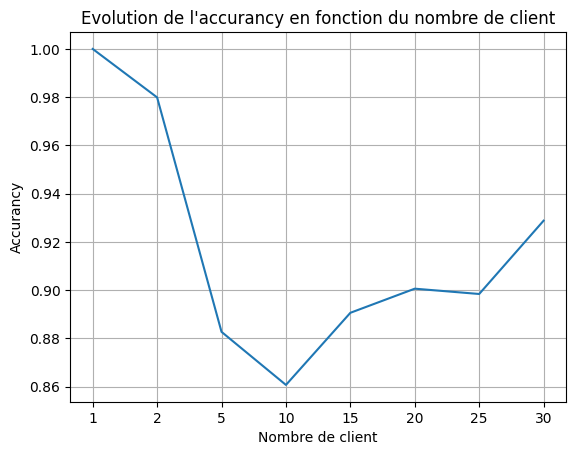

In [2]:
import matplotlib.pyplot as plt
s=5
num_client=['1','2','5','10','15','20','25','30']
acc=[1.0000,0.9799,0.8827, 0.8607,0.8906,0.9006,0.8984,0.9288]
plt.plot(num_client,acc)
plt.title("Evolution de l'accurancy en fonction du nombre de client")
plt.xlabel('Nombre de client')
plt.ylabel('Accurancy')
plt.grid()

In [4]:
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]]) 
points.storage()

 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [5]:
points.size()

torch.Size([3, 2])

In [6]:
points.storage_offset()

0

In [15]:
points[1].storage_offset()

2

In [ ]:
#2 client
[ 0.9523,1,0.9523]
#10 clients
[0.8205,0.8961,0.8925]
#20 clients
[0.9244,0.9212,0.9132]

(2, 1)

In [6]:
import numpy as np
deux=np.mean(np.array([ 0.9523,1,0.9523]))
dix=np.mean(np.array([0.8205,0.8961,0.8925]))
vingth=np.mean(np.array([0.9244,0.9212,0.9132]))
deux,dix,vingth

(np.float64(0.9682000000000001), np.float64(0.8697), np.float64(0.9196))